# Creating Test Dataset & Accuracy Scores

### Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import os,time,math

In [192]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import LassoCV
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score


### Load Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

### Train-Test Split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 0,test_size = 0.33)

In [8]:
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (576, 8)
y_train shape: (576,)
X_test shape: (192, 8)
y_test shape: (192,)


## Modeling

#### 1. Instantiate the model. Set parameters.

In [11]:
alg = linear_model.LogisticRegressionCV()

#### 2. Fit the model

In [12]:
alg.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

#### 3. Apply the model

In [219]:
predicted = alg.predict(X_test)

## Decision Tree in Python

<h3>Download and install <a href="http://www.graphviz.org/Download.php">graphviz</a></h3>
If you are having issues using Graphviz in Windows, then try the following steps:
<ol>
<li>1. Install Graphviz 
<li>2. After installing graphviz, add it to the Computer's Path. 
<ul>
<li>Go to PC properties 
<li> Click environment variables in the advanced settings section
<li> Add C:\Program Files (x86)\Graphviz2.38\bin\ to the PATH and click Apply
</ul>
<li> Install Pydotplus. Note that you will always have to install pydot after graphviz as Pydot is Graphviz's dot language and needs Graphviz for reference. 
</ol>
<h3>Install pydotplus (using pip): Install graphviz before you install pydotplus!</h3> 

In [43]:
import pydotplus

In [45]:
feature_names = [key for key in dataframe]

In [53]:
feature_names.remove('class')

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt_model = DecisionTreeClassifier(max_depth = 3,criterion='entropy')

In [105]:
dt_model.set_params()

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
dot_data = tree.export_graphviz(dt_model, out_file=None,feature_names=feature_names)
dot_data2 = tree.export_graphviz(dt_model, out_file=None,feature_names=feature_names,proportion=True)

In [80]:
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="plas <= 123.5\\nentropy = 0.941\\nsamples = 576\\nvalue = [370, 206]"] ;\n1 [label="mass <= 26.45\\nentropy = 0.685\\nsamples = 329\\nvalue = [269, 60]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="pedi <= 0.675\\nentropy = 0.087\\nsamples = 92\\nvalue = [91, 1]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 76\\nvalue = [76, 0]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.337\\nsamples = 16\\nvalue = [15, 1]"] ;\n2 -> 4 ;\n5 [label="age <= 28.5\\nentropy = 0.81\\nsamples = 237\\nvalue = [178, 59]"] ;\n1 -> 5 ;\n6 [label="entropy = 0.549\\nsamples = 126\\nvalue = [110, 16]"] ;\n5 -> 6 ;\n7 [label="entropy = 0.963\\nsamples = 111\\nvalue = [68, 43]"] ;\n5 -> 7 ;\n8 [label="mass <= 30.05\\nentropy = 0.976\\nsamples = 247\\nvalue = [101, 146]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="age <= 26.0\\nentropy = 0.881\\nsamples = 70\\nvalue = [49, 21]"] ;\n8 -> 9 ;\n10 [label="entro

In [82]:
graph = pydotplus.graph_from_dot_data(dot_data)

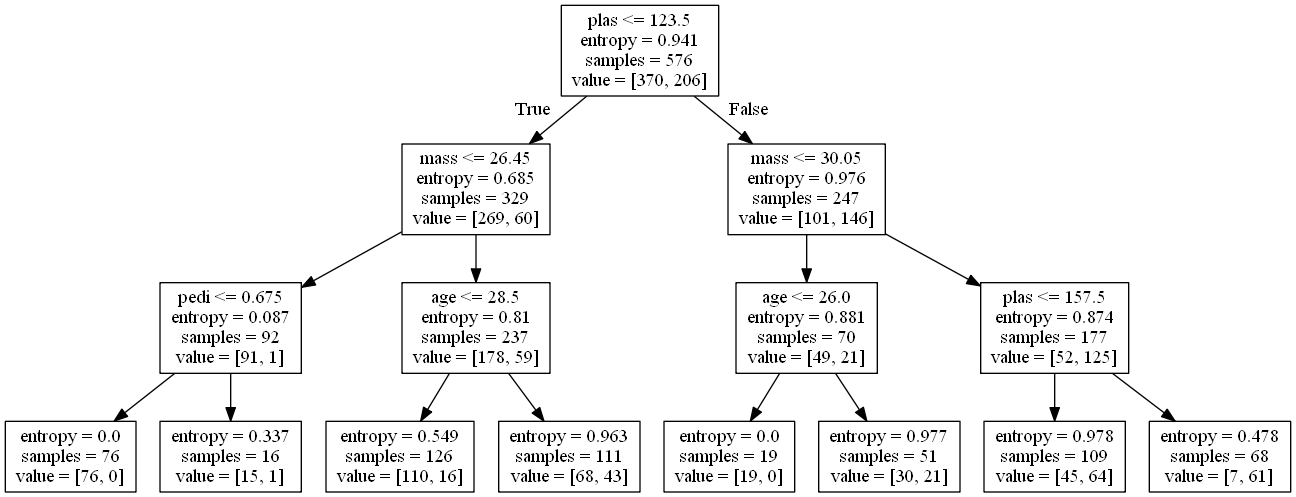

In [83]:
Image(graph.create_png())

In [62]:
from IPython.display import Image, display

def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

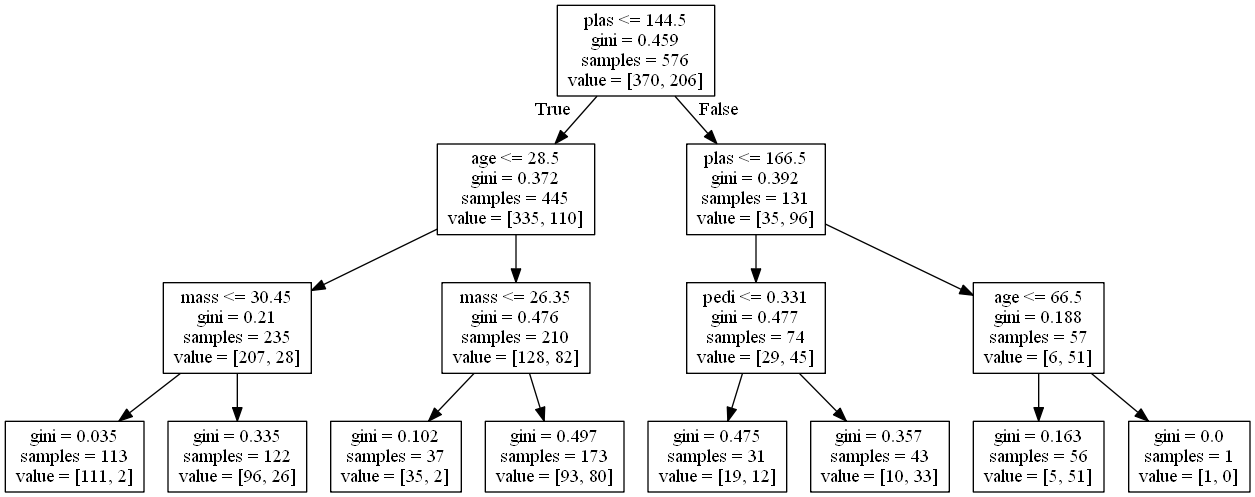

In [63]:
viewPydot(graph)

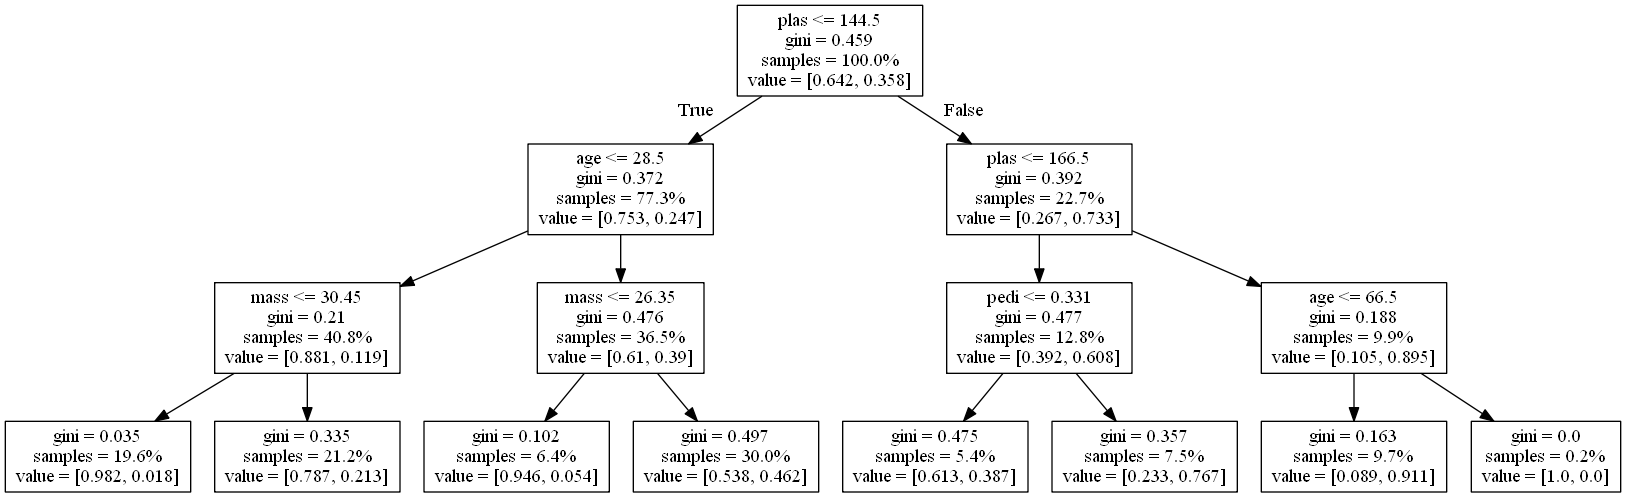

In [70]:
viewPydot(pydotplus.graph_from_dot_data(dot_data2))

In [64]:
graph.write_pdf("puma_diabetes.pdf")

True

### 1. Accuracy Score

In [19]:
print('Accuracy Score in Training Dataset {}' .format(round(alg.score(X_train,y_train),3)))
print('Accuracy Score in Test Dataset {}' .format(round(alg.score(X_test,y_test),3)))

Accuracy Score in Training Dataset 0.762
Accuracy Score in Test Dataset 0.781


In [20]:
from sklearn.cross_validation import cross_val_score
scores =  cross_val_score(alg, X_train, y_train, cv=5)
print("scores: %s  mean: %f  std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [ 0.74137931  0.79130435  0.74782609  0.73043478  0.75652174]  mean: 0.753493  std: 0.020734


### 2. Gini Function

In [85]:
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]
    
    # sort rows on prediction column 
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:,0].argsort()][::-1,0]
    pred_order = arr[arr[:,1].argsort()][::-1,0]
    
    # get Lorenz curves
    L_true = np.cumsum(true_order) / np.sum(true_order)
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    L_ones = np.linspace(1/n_samples, 1, n_samples)
    
    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)
    
    # normalize to true Gini coefficient
    return G_pred/G_true

In [93]:
print('Gini value for the model is %.3f' % Gini(y_test,alg.predict(X_test)))

Gini value for the model is 0.381


### 3. Confusion Matrix

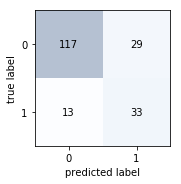

In [104]:
cm = confusion_matrix(alg.predict(X_test),y_test) # divide by X_test.shape[0] to get in %

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

### 4. ROC Curve

In [112]:
# import ggplot
from ggplot import *

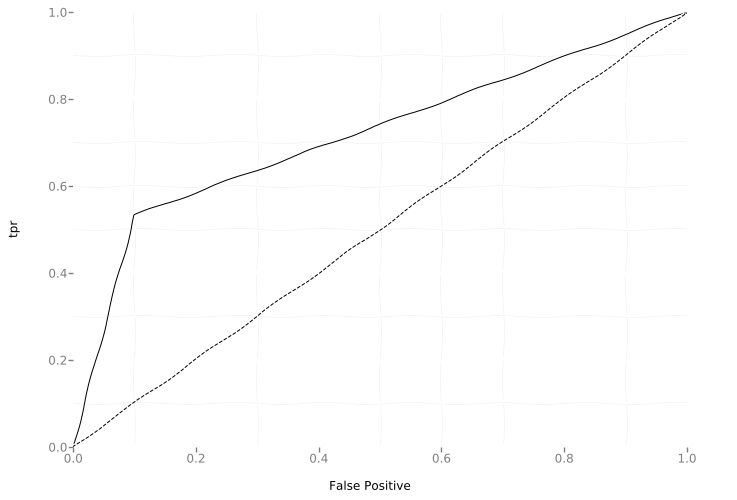

<ggplot: (-9223372036837740747)>

In [123]:
# using ggplot in python
fpr, tpr, th = roc_curve(y_test, alg.predict(X_test))
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df,aes(x='fpr', y='tpr')) + geom_line() + geom_abline(linetype='dashed') + xlim(0,1) + ylim(0,1) + theme_bw() + xlab('False Positive')

#### or use import scikitplot as skplt

#### Using Matplotlib

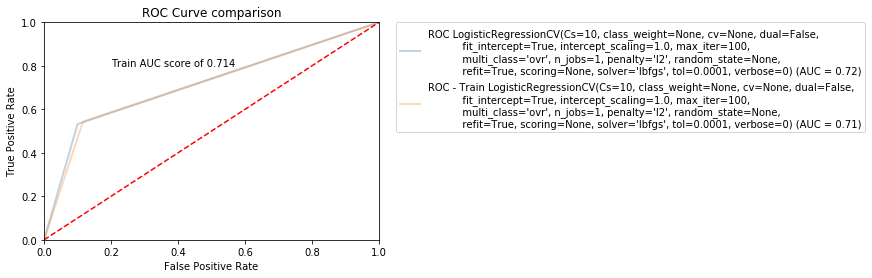

In [38]:
fp, tp, th = roc_curve(y_test, alg.predict(X_test))
roc_auc_mla = auc(fp, tp)
pl.clf() #Clear the current figure
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (alg, roc_auc_mla))

fp, tp, th = roc_curve(y_train, alg.predict(X_train))
roc_auc_mla2 = auc(fp, tp)
plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC - Train %s (AUC = %0.2f)'  % (alg, roc_auc_mla2))

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.annotate('Train AUC score of {}'.format(round(auc(fp,tp),3)), xy=(0.2, 0.8))
plt.show()

### 5.Lift & Cumulative Gains Chart

In [208]:
names

['preg',
 'plas',
 'pres',
 'skin',
 'test',
 'mass',
 'pedi',
 'age',
 'actual_col',
 'predicted_col',
 'probability_col']

In [186]:
probability_col = alg.predict_proba(X_test)[:,1]
predicted_col = alg.predict(X_test)
actual_col = y_test
scored_test_df = pd.concat([pd.DataFrame(X_test),pd.DataFrame(actual_col),pd.DataFrame(predicted_col),pd.DataFrame(probability_col)],axis= 1)
scored_test_df.columns = names

In [188]:
scored_test_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,actual_col,predicted_col,probability_col
0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0,1.0,1.0,0.908509
1,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0,0.0,0.0,0.189770
2,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0,0.0,0.0,0.081102
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1.0,1.0,0.659055
4,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0,0.0,0.0,0.130682


In [190]:
def calc_cumulative_gains(df: pd.DataFrame, actual_col: str, predicted_col:str, probability_col:str):
    df.sort_values(by=probability_col, ascending=False, inplace=True)

    subset = df[df[predicted_col] == True]

    rows = []
    for group in np.array_split(subset, 10):
        score = accuracy_score(group[actual_col].tolist(),
                                                   group[predicted_col].tolist(),
                                                   normalize=False)

        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score})

    lift = pd.DataFrame(rows)

    #Cumulative Gains Calculation
    lift['RunningCorrect'] = lift['NumCorrectPredictions'].cumsum()
    lift['PercentCorrect'] = lift.apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x['RunningCorrect'], axis=1)
    lift['CumulativeCorrectBestCase'] = lift['NumCases'].cumsum()
    lift['PercentCorrectBestCase'] = lift['CumulativeCorrectBestCase'].apply(
        lambda x: 100 if (100 / lift['NumCorrectPredictions'].sum()) * x > 100 else (100 / lift[
            'NumCorrectPredictions'].sum()) * x)
    lift['AvgCase'] = lift['NumCorrectPredictions'].sum() / len(lift)
    lift['CumulativeAvgCase'] = lift['AvgCase'].cumsum()
    lift['PercentAvgCase'] = lift['CumulativeAvgCase'].apply(
        lambda x: (100 / lift['NumCorrectPredictions'].sum()) * x)

    #Lift Chart
    lift['NormalisedPercentAvg'] = 1
    lift['NormalisedPercentWithModel'] = lift['PercentCorrect'] / lift['PercentAvgCase']

    return lift

In [196]:
def plot_cumulative_gains(lift: pd.DataFrame):
    fig, ax = plt.subplots()
    fig.canvas.draw()

    handles = []
    handles.append(ax.plot(lift['PercentCorrect'], 'r-', label='Percent Correct Predictions'))
    handles.append(ax.plot(lift['PercentCorrectBestCase'], 'g-', label='Best Case (for current model)'))
    handles.append(ax.plot(lift['PercentAvgCase'], 'b-', label='Average Case (for current model)'))
    ax.set_xlabel('Total Population (%)')
    ax.set_ylabel('Number of Respondents (%)')

    ax.set_xlim([0, 9])
    ax.set_ylim([10, 100])

    labels = [int((label+1)*10) for label in [float(item.get_text()) for item in ax.get_xticklabels()]]

    ax.set_xticklabels(labels)

#     fig.legend(handles, labels=[h[0].get_label() for h in handles])
    fig.show()

In [206]:
def plot_lift_chart(lift: pd.DataFrame):
    plt.figure()
    plt.plot(lift['NormalisedPercentAvg'], 'r-', label='Normalised \'response rate\' with no model')
    plt.plot(lift['NormalisedPercentWithModel'], 'g-', label='Normalised \'response rate\' with using model')
    plt.legend(fontsize = 'x-small')
    plt.show()

In [194]:
lift_df = calc_cumulative_gains(scored_test_df,'actual_col','predicted_col',probability_col='probability_col')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


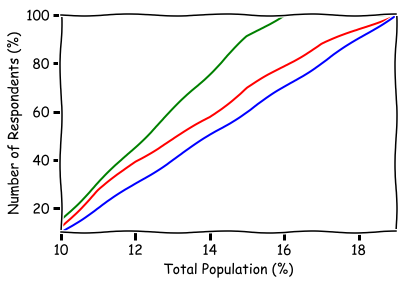

In [198]:
plot_cumulative_gains(lift_df)

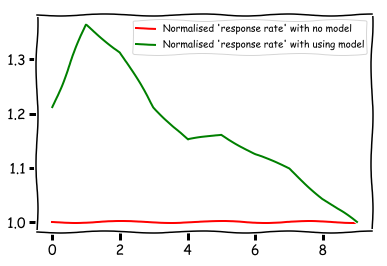

In [207]:
plot_lift_chart(lift_df)

In [201]:
lift_df

,NumCases,NumCorrectPredictions,RunningCorrect,PercentCorrect,CumulativeCorrectBestCase,PercentCorrectBestCase,AvgCase,CumulativeAvgCase,PercentAvgCase,NormalisedPercentAvg,NormalisedPercentWithModel
0,5,4,4,12.121212,5,15.151515,3.3,3.3,10.0,1,1.212121
1,5,5,9,27.272727,10,30.303030,3.3,6.6,20.0,1,1.363636
2,5,4,13,39.393939,15,45.454545,3.3,9.9,30.0,1,1.313131
3,5,3,16,48.484848,20,60.606061,3.3,13.2,40.0,1,1.212121
4,5,3,19,57.575758,25,75.757576,3.3,16.5,50.0,1,1.151515
5,5,4,23,69.696970,30,90.909091,3.3,19.8,60.0,1,1.161616
6,4,3,26,78.787879,34,100.000000,3.3,23.1,70.0,1,1.125541
7,4,3,29,87.878788,38,100.000000,3.3,26.4,80.0,1,1.098485
8,4,2,31,93.939394,42,100.000000,3.3,29.7,90.0,1,1.043771
9,4,2,33,100.000000,46,100.000000,3.3,33.0,100.0,1,1.000000
